# Vergleich der Mittelwerte eines einzelnen Pixel zu den restlichen STEP-Pixeln

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from STEP import STEP

In [2]:
ebins = np.array([  0.98 ,   2.144,   2.336,   2.544,   2.784,   3.04 ,   3.312,
         3.6  ,   3.92 ,   4.288,   4.672,   5.088,   5.568,   6.08 ,
         6.624,   7.2  ,   7.84 ,   8.576,   9.344,  10.176,  11.136,
        12.16 ,  13.248,  14.4  ,  15.68 ,  17.152,  18.688,  20.352,
        22.272,  24.32 ,  26.496,  28.8  ,  31.36 ,  34.304,  37.376,
        40.704,  44.544,  48.64 ,  52.992,  57.6  ,  62.72 ,  68.608,
        74.752,  81.408,  89.088,  97.28 , 105.984, 115.2  , 125.44 ,
       137.216, 149.504, 162.816, 178.176, 194.56 , 211.968, 230.4  ,
       372.736])
def grenz(t):
    return -0.5*t + 20

In [3]:
dat = STEP(2021, 12, 4, rpath='data/STEP/', mag_path='data/mag/srf', mag_frame = 'srf')
period =(dt.datetime(2021,12,4,13,50),dt.datetime(2021,12,4,14,30))

STEP-Data loaded successfully.
STEP-Data combined successfully.
2021-12-04 00:00:00 data/mag/srf/2021/solo_L2_mag-srf-normal_20211204_V01.cdf
No MAG data :  2021-12-04 00:00:00


Ausprobieren Scatter-Plot für Energie-Vergleich. Danach auch Histogramm ausprobieren...  
Ist Histogramm überhaupt sinnvoll, wenn ich so wenige Datenpunkte habe?  
Lineare Regression macht keinen Sinn, wenn die Unterschiede energieabhängig sind.

Es wäre nice ein sinnvolles Abstandsmaß zu haben, welches ich für alle Pixel nutzen kann.  
Dann kann ich mit dem Vergleichspixel vergleichen.

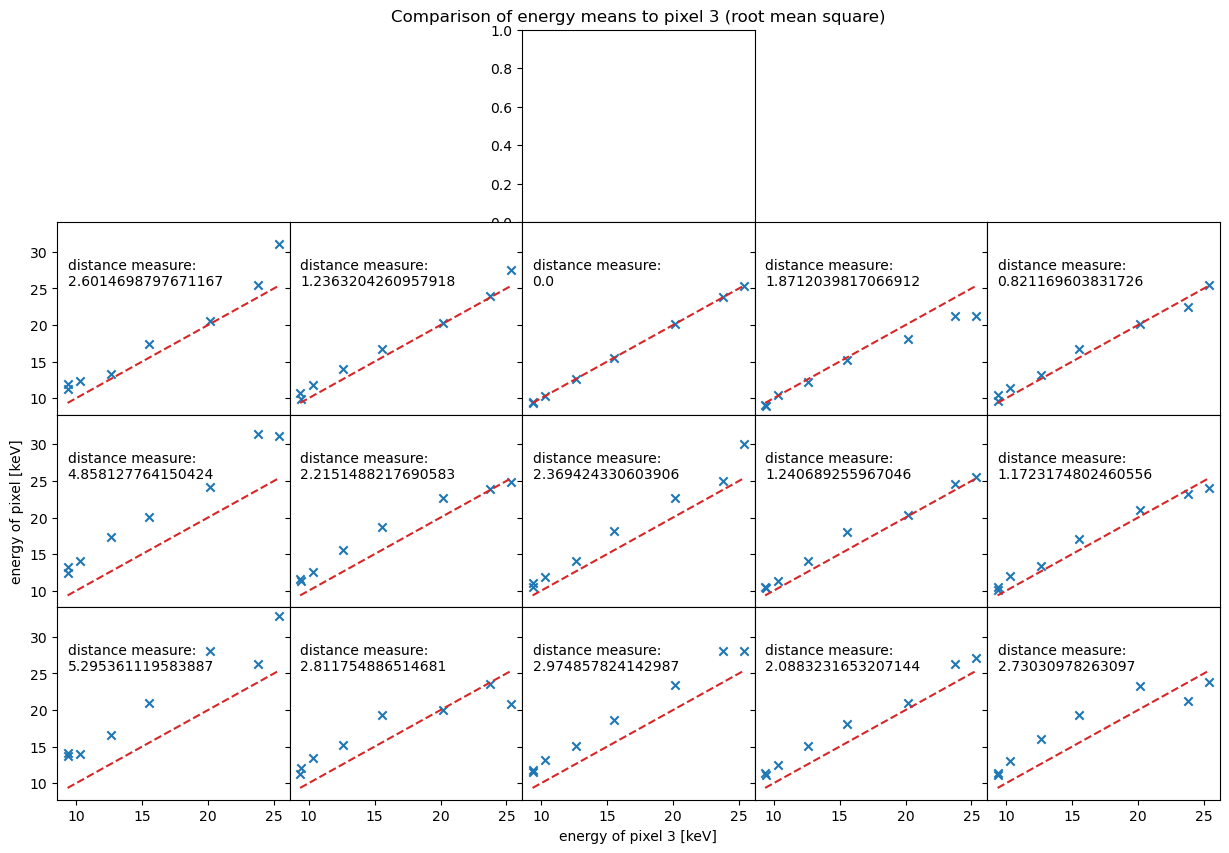

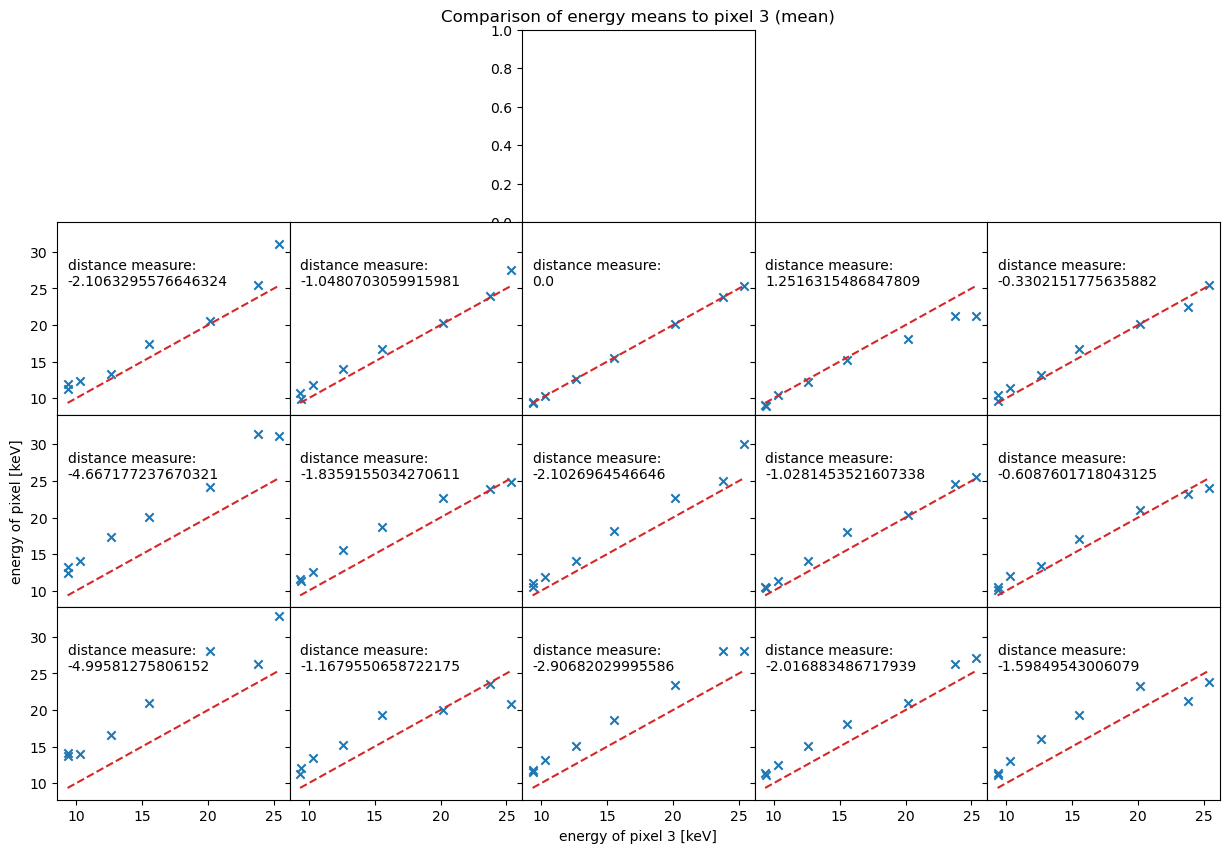

In [12]:
def rms(current_array,array_to_compare_to):
    '''Berechnet root mean square der Residuen vom Vergleichspixel für alle Datenpunkte des arrays.
    Als Rückgabewerte der berechnete Wert des Abstandsmaßes und ein string mit dem Namen des Maßes.'''
    squared_residuals = np.square(array_to_compare_to - current_array)
    n = len(array_to_compare_to)
    return np.sqrt(np.sum(squared_residuals)/n), 'root mean square'

def mean(current_array,array_to_compare_to):
    '''Berechnet Mittelwert der Residuen vom Vergleichspixel für alle Datenpunkte des arrays.
    Habe durch das Vorzeichen auch eine Information über die "Richtung" der Abweichung.
    Als Rückgabewerte der berechnete Wert des Abstandsmaßes und ein string mit dem Namen des Maßes.'''
    residuals = array_to_compare_to - current_array
    n = len(array_to_compare_to)
    return np.sum(residuals)/n, 'mean'

def energy_comparison(self,pixel_comparing,distance_measure):
    '''Übergebe Abstandsmaß mit zwei Arrays für Energiemittelwerte als Parameter.'''
    pixel_means, pixel_var = self.calc_energy_means(ebins=ebins,head=-1, period=period, grenzfunktion=grenz, norm='ptmax')
    pw, pw_time = self.calc_pw(period, window_width=5)
    corrected_energies = []

    for pixel2 in range(1,16):
        # Übergebe willkürliche Fehler, da ich diese eh nicht brauche.
        corrected_energies.append(self.energy_correction(pixel_means[pixel2],pw[pixel_comparing-1],pw[pixel2-1],2,2)[0])

    fig, axes = self.step_plot(f'energy of pixel {pixel_comparing} [keV]', f'energy of pixel [keV]', f'Comparison of energy means to pixel {pixel_comparing} ({distance_measure(np.array([0]),np.array([0]))[1]})')

    min_energy = min(pixel_means[pixel_comparing])
    max_energy = max(pixel_means[pixel_comparing])

    for i, ax in enumerate(axes):
        if i == 0:
            continue
        distamce_measure = distance_measure(pixel_means[i],pixel_means[pixel_comparing])[0]
        ax.scatter(pixel_means[pixel_comparing],pixel_means[i],marker='x')
        ax.plot([min_energy, max_energy], [min_energy, max_energy], c='tab:red',linestyle='--')
        ax.text(min_energy,max_energy,f'distance measure:\n{distamce_measure}')

    
energy_comparison(dat,3,rms)
energy_comparison(dat,3,mean)